In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the File

In [99]:
urlfile="https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv"

In [100]:
df=pd.read_csv(urlfile)

In [101]:
df.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


## Primary Inspection

In [102]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [103]:
#shape
df.shape

(200, 5)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [105]:
df.drop(columns='Unnamed: 0', inplace=True)

## Pair Plot

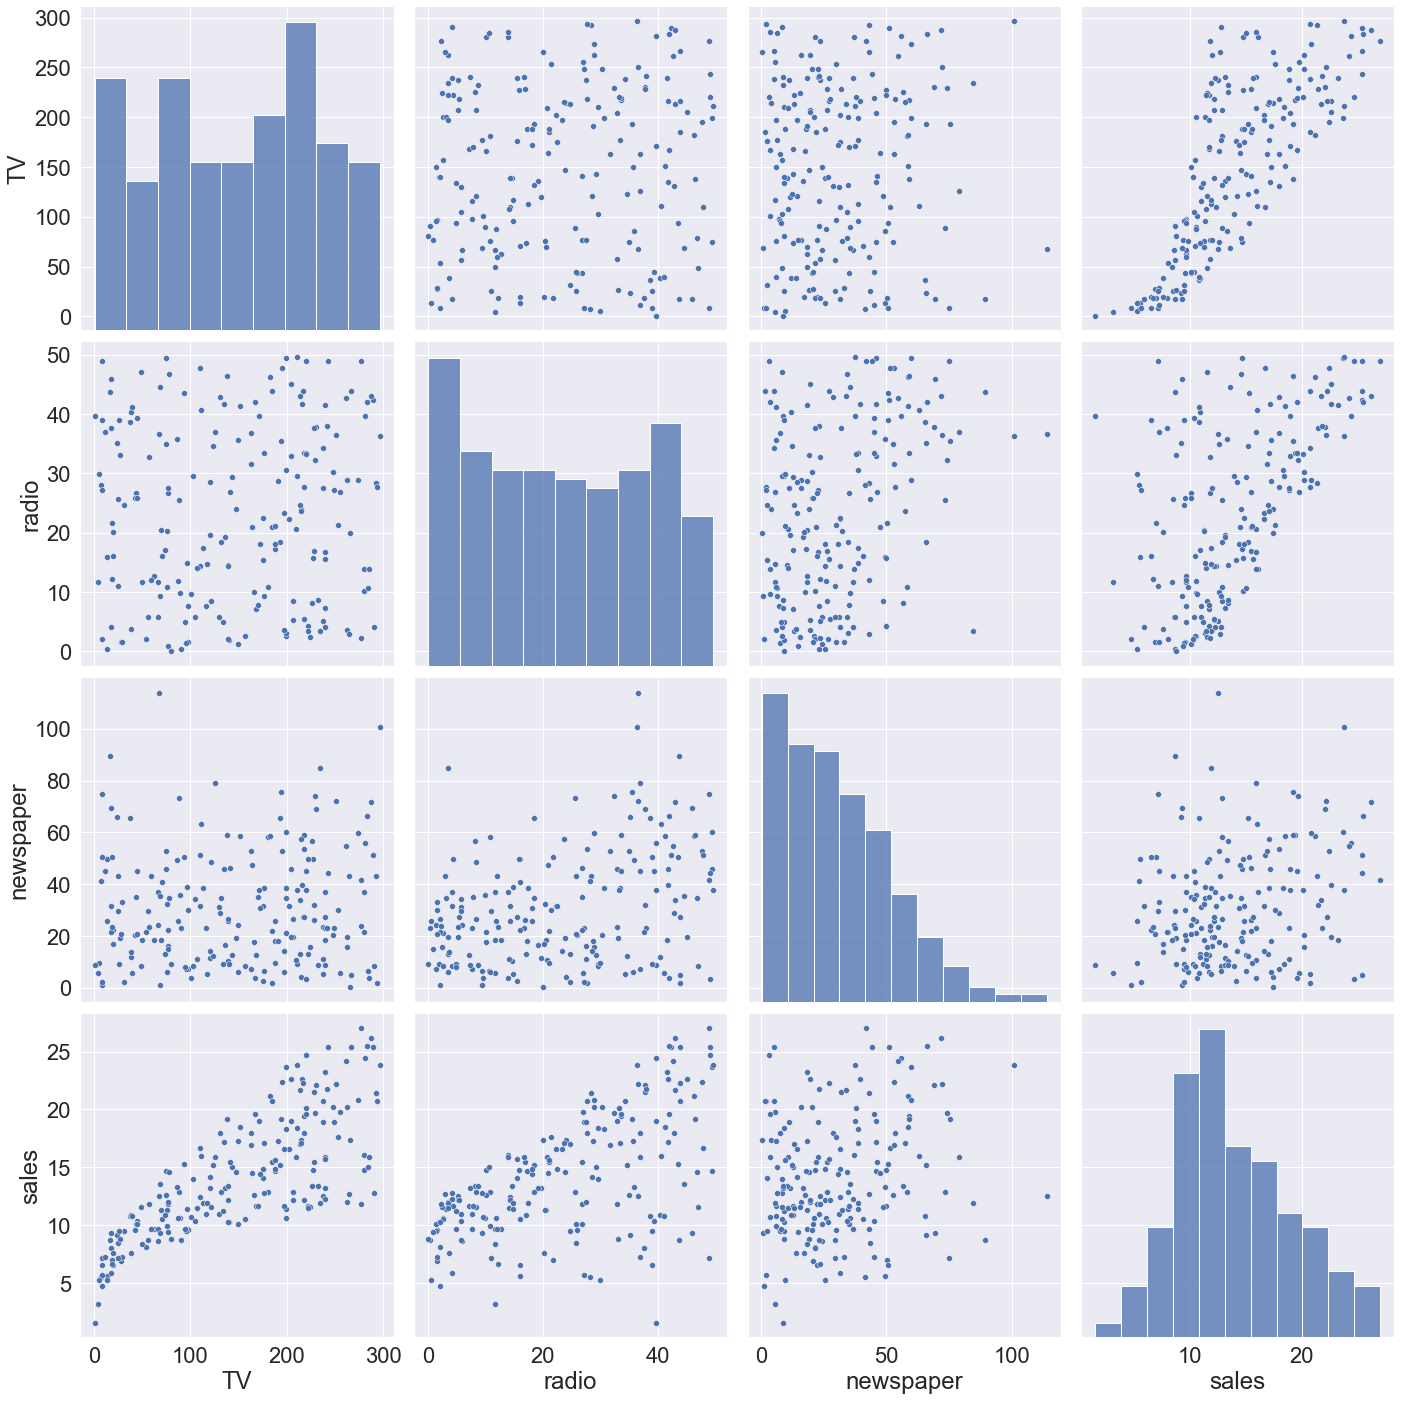

In [29]:
sns.pairplot(df,height=5)
sns.set(font_scale=2)

## Checking The Correlation

In [107]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Newspaper has a very low coorelation with the output variable

In [11]:
# for i in df.columns:
#     df.loc[df[i]>df[i].quantile(0.84),i]=df[i].quantile(0.84)
#     df.loc[df[i]<df[i].quantile(0.16),i]=df[i].quantile(0.16)

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [69]:
X=df.drop('sales',axis=1)
y=df['sales']

## Splitting and Scaling

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [71]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Linear Regression

In [72]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [74]:
r2_score(y_train,y_train_pred)

0.892804847190598

In [75]:
r2_score(y_test,y_test_pred)

0.9058622107532246

In [76]:
cross_val_score(lr,X_train,y_train,cv=5)

array([0.88223088, 0.77595577, 0.87844429, 0.92127295, 0.87943863])

## Polynomial Regression

In [86]:
#df_1=df.drop('newspaper',axis=1).copy()
df_1=df.copy()
df_1['tv_s']=df_1['TV'].apply(lambda x: x**2)
df_1['radio_s']=df_1['radio'].apply(lambda x: x**2)

In [87]:
X=df_1.drop('sales',axis=1)
y=df_1['sales']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [89]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [90]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [92]:
r2_score(y_train,y_train_pred)

0.9140303090886952

In [93]:
r2_score(y_test,y_test_pred)

0.9211033626830645

In [94]:
cross_val_score(lr,X_train,y_train,cv=5)

array([0.92646627, 0.88020564, 0.90969429, 0.9532658 , 0.80276786])

# Conclusion: It can be seen that the polynomial regression model gives some better results.